In [1]:
import clip
import numpy as np
import torch

import PIL.Image

from embedding import get_delta_t
from manipulator import Manipulator
from mapper import get_delta_s
from wrapper import Generator

/opt/conda/lib/python3.8/site-packages/clip/clip.py:24: UserWarning: PyTorch version 1.7.1 or higher is recommended
  warnings.warn("PyTorch version 1.7.1 or higher is recommended")


In [2]:
device = torch.device('cuda:3')
ckpt = 'pretrained/ffhq.pkl'
G = Generator(ckpt, device)
model, preprocess = clip.load("ViT-B/32", device=device)

fs3 = np.load('tensor/fs3.npy')

In [3]:
classnames = ['face',
             'face with glasses']
#classnames = ['neutral face', 'sad face']
#classnames = ['neutral', 'angry face']
#classnames = ['face', 'face with small nose']

In [4]:
delta_t = get_delta_t(classnames, model)

In [5]:
lst_alpha = [-20, -10, -5, 0, 5, 10, 20]
#lst_alpha = [-5, -3, -2, 0, 2, 3, 5]

In [6]:
num_images = 1
start_ind = 0

In [7]:
manipulator = Manipulator(G, device, lst_alpha, num_images, start_ind=start_ind)

In [8]:
beta_threshold = 0.13

In [9]:
delta_s, num_channel = get_delta_s(fs3, delta_t, manipulator, beta_threshold=beta_threshold)

In [10]:
styles = manipulator.manipulate(delta_s)

In [11]:
all_imgs = manipulator.synthesis_from_styles(styles, 0, 1)

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


In [12]:
all_imgs = [(imgs.permute(0,2,3,1)*127.5+128).clamp(0,255).to(torch.uint8).numpy()
        for imgs in all_imgs]

-20


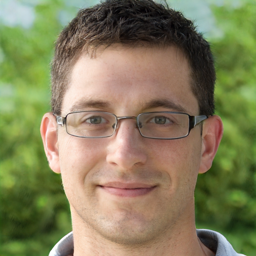

-10


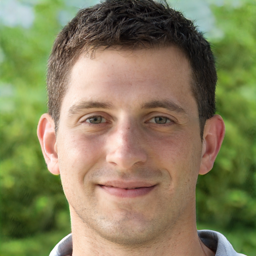

-5


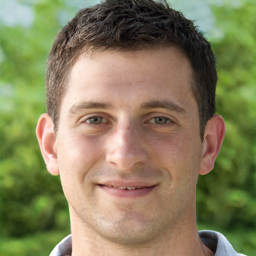

0


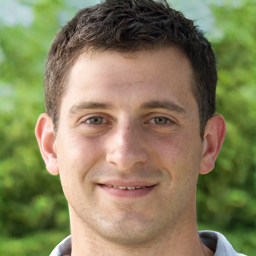

5


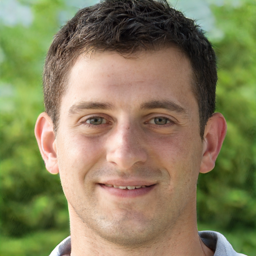

10


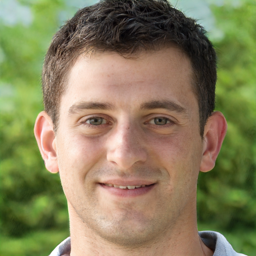

20


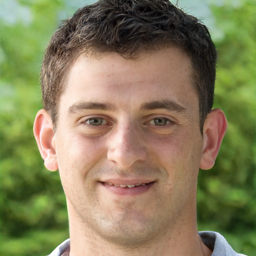

In [13]:
for i, alpha in enumerate(lst_alpha):
    print(alpha)
    imgs = all_imgs[i]
    for img in imgs:
        display(PIL.Image.fromarray(img).resize((256,256)))